In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow 
from tqdm import tqdm
from keras.preprocessing import image
from keras.applications import VGG16
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D
from keras.optimizers import Adam





In [5]:
# Read the labels.csv file and check shape and records
labels_all = pd.read_csv('../dogs_classifier/data/dogs.csv')
print(labels_all.shape)
labels_all

(9346, 3)


,filepaths,labels,data set
0,train/Afghan/001.jpg,Afghan,train
1,train/Afghan/002.jpg,Afghan,train
2,train/Afghan/003.jpg,Afghan,train
3,train/Afghan/004.jpg,Afghan,train
4,train/Afghan/005.jpg,Afghan,train
...,...,...,...
9341,valid/Yorkie/06.jpg,Yorkie,valid
9342,valid/Yorkie/07.jpg,Yorkie,valid
9343,valid/Yorkie/08.jpg,Yorkie,valid
9344,valid/Yorkie/09.jpg,Yorkie,valid


In [7]:
# Loading number or each breed
breed_all = labels_all['labels']
breed_count = breed_all.value_counts()
breed_all.unique()

array(['Afghan', 'African Wild Dog', 'Airedale', 'American Hairless',
       'American Spaniel', 'Basenji', 'Basset', 'Beagle',
       'Bearded Collie', 'Bermaise', 'Bichon Frise', 'Blenheim',
       'Bloodhound', 'Bluetick', 'Border Collie', 'Borzoi',
       'Boston Terrier', 'Boxer', 'Bull Mastiff', 'Bull Terrier',
       'Bulldog', 'Cairn', 'Chihuahua', 'Chinese Crested', 'Chow',
       'Clumber', 'Cockapoo', 'Cocker', 'Collie', 'Corgi', 'Coyote',
       'Dalmation', 'Dhole', 'Dingo', 'Doberman', 'Elk Hound',
       'French Bulldog', 'German Sheperd', 'Golden Retriever',
       'Great Dane', 'Great Perenees', 'Greyhound', 'Groenendael',
       'Irish Spaniel', 'Irish Wolfhound', 'Japanese Spaniel', 'Komondor',
       'Labradoodle', 'Labrador', 'Lhasa', 'Malinois', 'Maltese',
       'Mex Hairless', 'Newfoundland', 'Pekinese', 'Pit Bull',
       'Pomeranian', 'Poodle', 'Pug', 'Rhodesian', 'Rottweiler',
       'Saint Bernard', 'Schnauzer', 'Scotch Terrier', 'Shar_Pei',
       'Shiba In

In [8]:
# Selecting all breeds because i have high computation power
CLASS_NAME = ['Shiba Inu', 'Rhodesian', 'Siberian Husky', 'Collie']
labels = labels_all[(labels_all['labels'].isin(CLASS_NAME))]
labels = labels.reset_index()
labels_train = labels[labels["data set"] == "train"]
labels_test = labels[labels["data set"] == "test"]
labels_valid = labels[labels["data set"] == "valid"]



In [9]:
# Creating numpy matrix with zeros
X_data_train = np.zeros((len(labels_train), 224, 224, 3), dtype='float32')
X_data_test = np.zeros((len(labels_test), 224, 224, 3), dtype='float32')
X_data_valid = np.zeros((len(labels_valid), 224, 224, 3), dtype='float32')
# One hot encoding
Y_data_train = label_binarize(labels_train['labels'], classes = CLASS_NAME)
Y_data_test = label_binarize(labels_test['labels'], classes = CLASS_NAME)
Y_data_valid = label_binarize(labels_valid['labels'], classes = CLASS_NAME)


# Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels_train))):
    img = image.load_img('../dogs_classifier/data/%s' % labels_train['filepaths'][i], target_size=(224, 224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data_train[i] = x / 255.0

# Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels_test))):
    img = image.load_img('../dogs_classifier/data/%s' % labels_test['filepaths'][len(labels_train)+i], target_size=(224, 224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data_test[i] = x / 255.0

# Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels_valid))):
    img = image.load_img('../dogs_classifier/data/%s' % labels_valid['filepaths'][len(labels_train)+len(labels_test)+i], target_size=(224, 224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data_valid[i] = x / 255.0

# Printing train image and one hot encode shape & size
print('\nTrain Images shape: ',X_data_train.shape,' size: {:,}'.format(X_data_train.size))
print('One-hot encoded output shape: ',Y_data_train.shape,' size: {:,}'.format(Y_data_train.size))


100%|██████████| 40/40 [00:00<00:00, 946.81it/s]


Train Images shape:  (416, 224, 224, 3)  size: 62,619,648
One-hot encoded output shape:  (416, 4)  size: 1,664


In [10]:
model = Sequential()

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation ='relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(len(CLASS_NAME), activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001), metrics=['accuracy'])

model.summary()


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       410,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 822,820 (3.14 MB)

 Trainable params: 822,820 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Training the model
epochs = 13
batch_size = 32

history = model.fit(X_data_train, Y_data_train, batch_size = batch_size, epochs = epochs, validation_data = (X_data_valid, Y_data_valid))

Epoch 1/13
13/13 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.2960 - loss: 1.3831 - val_accuracy: 0.2500 - val_loss: 1.4323
Epoch 2/13
13/13 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.3066 - loss: 1.3850 - val_accuracy: 0.2500 - val_loss: 1.4385
Epoch 3/13
13/13 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.3137 - loss: 1.3657 - val_accuracy: 0.2500 - val_loss: 1.4404
Epoch 4/13
13/13 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - accuracy: 0.3158 - loss: 1.3519 - val_accuracy: 0.4750 - val_loss: 1.3859
Epoch 5/13
13/13 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.3367 - loss: 1.3297 - val_accuracy: 0.3250 - val_loss: 1.3310
Epoch 6/13
13/13 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.4197 - loss: 1.2564 - val_accuracy: 0.5000 - val_loss: 1.2052
Epoch 7/13
13/13 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.4094 - loss: 1.2024 - val_accuracy: 0.6000 - val_loss: 1.0681
Epoch 8/13
13/13 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step - accuracy: 0.4593 - loss: 1.1334 - val_accuracy: 0.6000 - val_loss:

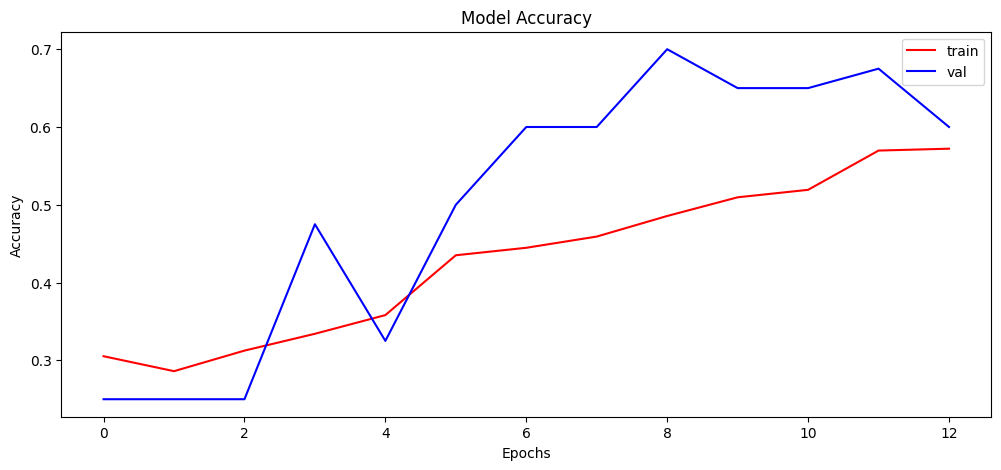

In [12]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [13]:
Y_pred = model.predict(X_data_test)
score = model.evaluate(X_data_test, Y_data_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - accuracy: 0.6854 - loss: 0.7910
Accuracy over the test set: 
  70.0 %


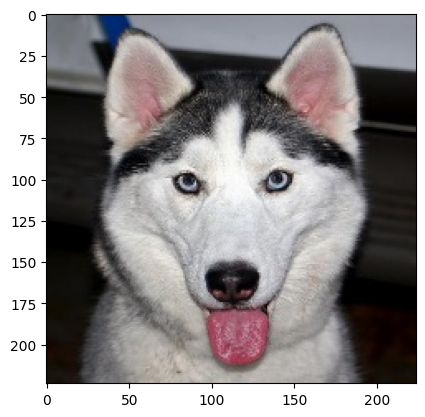

Originally :  Siberian Husky
Predicted :  Siberian Husky


In [27]:
idx = random.randint(1, len(Y_data_test))
plt.imshow(X_data_test[idx,:,:,:])
plt.show()

print("Originally : ",labels_test['labels'][idx + len(labels_train)])
print("Predicted : ",CLASS_NAME[np.argmax(Y_pred[idx])])

In [29]:

img = image.load_img('../dogs_classifier/yuki_1.jpg', target_size=(224, 224))
img = image.img_to_array(img)
x = np.expand_dims(img.copy(), axis=0)
X_data_Yuki = x / 255.0

In [30]:
Y_pred_Yuki = model.predict(X_data_Yuki)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


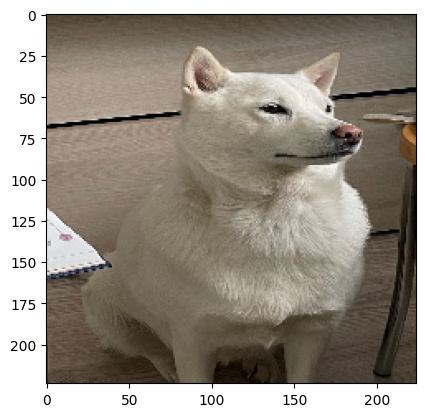

Originally :  Beloved Hokkaido Girl
Predicted :  Siberian Husky


In [31]:
plt.imshow(X_data_Yuki[0,:,:,:])
plt.show()

print("Originally :  Beloved Hokkaido Girl")
print("Predicted : ",CLASS_NAME[np.argmax(Y_pred_Yuki[0])])

In [32]:

img = image.load_img('../dogs_classifier/saya.jpg', target_size=(224, 224))
img = image.img_to_array(img)
x = np.expand_dims(img.copy(), axis=0)
X_data_Saya = x / 255.0

In [33]:
Y_pred_Saya = model.predict(X_data_Saya)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


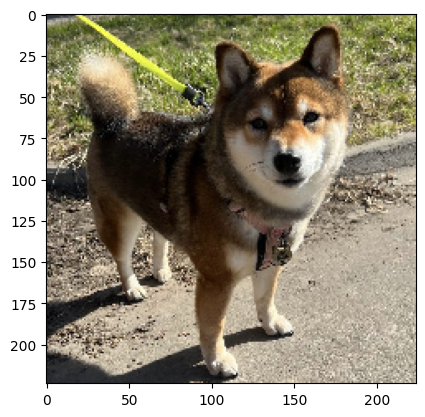

Originally :  Saya
Predicted :  Shiba Inu


In [34]:
plt.imshow(X_data_Saya[0,:,:,:])
plt.show()

print("Originally :  Saya")
print("Predicted : ",CLASS_NAME[np.argmax(Y_pred_Saya[0])])